<a href="https://colab.research.google.com/github/ARNAVKS/Internship-Project/blob/main/Bird_Strike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bird Strike Analysis

**Importing the required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

**Reading the given dataset**

In [ ]:
table=pd.read_csv('Bird Strikes data.xlsx - Bird Strikes.csv')

In [ ]:
table.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [ ]:
len(table)

25558

**Checking for null values**

In [ ]:
table.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

**Removing null values**

* **There are two columns consisting more that 23k null values and one column consisting more than 4k null values.**

* **You can see above there are many columns consisting 129 null values, so there is a posiiblility that they are of same rows. Lets check it.**

* **Now filling up all the null values in the columns that consisting more than 129 null values with 'Unknown' because all the columns is either the status of altitude or effect/impact on the plane or weather. So if these columns that is null then we could denote it as 'Unknown'.**

In [ ]:
table[['Effect: Impact to flight','Aircraft: Number of engines?','Origin State','Conditions: Precipitation','Remarks']]=table[['Effect: Impact to flight','Aircraft: Number of engines?','Origin State','Conditions: Precipitation','Remarks']].fillna('Unknown')

**Now we got columns that consisting only 129 null values**

In [ ]:
table.isnull().sum()

Record ID                                    0
Aircraft: Type                             129
Airport: Name                              129
Altitude bin                               129
Aircraft: Make/Model                         0
Wildlife: Number struck                    129
Wildlife: Number Struck Actual               0
Effect: Impact to flight                     0
FlightDate                                 129
Effect: Indicated Damage                     0
Aircraft: Number of engines?                 0
Aircraft: Airline/Operator                 129
Origin State                                 0
When: Phase of flight                      129
Conditions: Precipitation                    0
Remains of wildlife collected?               0
Remains of wildlife sent to Smithsonian      0
Remarks                                      0
Wildlife: Size                             129
Conditions: Sky                              0
Wildlife: Species                            0
Pilot warned 

**To check if those null values come from common rows we will drop those null values and see if the length of the data decreases with 129 or more**

In [ ]:
table.shape

(25558, 26)

In [ ]:
table.dropna(inplace=True)

**As $25558-129=25429$ which proves that that all 129 null values from all columns belongs to common rows**

In [ ]:
table.shape

(25429, 26)

**So, we have removed all the null values**

In [ ]:
table.isnull().sum()

Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Remarks                                    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Tota

In [ ]:
table.shape

(25429, 26)

In [ ]:
table.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

***

**Extracting the Airport names with their number of Bird Strike encounter in descending order**

In [ ]:
airport_bird=table['Airport: Name'].value_counts()

In [ ]:
airport_bird=pd.DataFrame(airport_bird)

**Top 50 Airport in terms of Number of Bird Strikes**

In [ ]:
airport_bird.head(50)

,count
Airport: Name,
DALLAS/FORT WORTH INTL ARPT,803
SACRAMENTO INTL,676
SALT LAKE CITY INTL,479
DENVER INTL AIRPORT,476
KANSAS CITY INTL,452
PHILADELPHIA INTL,442
ORLANDO INTL,408
BALTIMORE WASH INTL,401
LOUISVILLE INTL ARPT,395


***

**Extracting the Airlines with their number of Bird Strike encounter in descending order**

In [ ]:
airline_bird=pd.DataFrame(table['Aircraft: Airline/Operator'].value_counts())

**Top 10 Airlines in terms of Number of Bird Strikes**

In [ ]:
airline_bird.head(10)

,count
Aircraft: Airline/Operator,
SOUTHWEST AIRLINES,4628
BUSINESS,3074
AMERICAN AIRLINES,2058
DELTA AIR LINES,1349
AMERICAN EAGLE AIRLINES,932
SKYWEST AIRLINES,891
US AIRWAYS*,797
JETBLUE AIRWAYS,708
UPS AIRLINES,590


***

**Now changing the type of FlightDate column into Datetime object, but first change the required column we need to convert to the format of MM/DD/YYYY**

In [ ]:
table['FlightDate'][0]

'11/23/00 0:00'

In [ ]:
table['FlightDate']=table['FlightDate'].apply(lambda x:x.replace(' 0:00',''))

In [ ]:
table['FlightDate'][0]

'11/23/00'

In [ ]:
table['FlightDate']=table['FlightDate'].apply(lambda x:x.split('/'))

In [ ]:
table['FlightDate'][0]

['11', '23', '00']

In [ ]:
table['FlightDate']=table['FlightDate'].apply(lambda x:x[0]+'/'+x[1]+'/'+'20'+x[2])

In [ ]:
table['FlightDate'][0]

'11/23/2000'

In [ ]:
table['FlightDate']=pd.to_datetime(table['FlightDate'])

**After converting to Datetime object**

In [ ]:
table['FlightDate'][0]

Timestamp('2000-11-23 00:00:00')

**Separating the year and month in the different columns and changing it type to string as we do not want year and month value to be identified as an integer**

In [ ]:
table['FlightYear']=table['FlightDate'].dt.year

In [ ]:
table['FlightYear']=table['FlightYear'].apply(str)

In [ ]:
table['FlightMonth']=table['FlightDate'].dt.month

In [ ]:
table['FlightMonth']=table['FlightMonth'].apply(str)

In [ ]:
table.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,FlightYear,FlightMonth
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes,2000,11
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,Unknown,2001-07-25,Caused damage,...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No,2001,7
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,Unknown,2001-09-14,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2001,9
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,Small,Some Cloud,European starling,Y,0,50,0,Yes,2002,9
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,Unknown,2003-06-23,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2003,6


In [ ]:
table.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'FlightYear', 'FlightMonth'],
      dtype='object')

***

**Yearly Analysis of Number of Bird Strikes**

In [ ]:
table['FlightYear'].value_counts()

FlightYear
2009    3247
2010    3121
2011    2952
2007    2301
2008    2258
2006    2159
2005    1853
2004    1692
2002    1681
2003    1568
2000    1367
2001    1230
Name: count, dtype: int64

In [ ]:
year_bird=pd.DataFrame(table['FlightYear'].value_counts())

**As it is in descending order we will sort it by sorting index with ascending order**

In [ ]:
year_bird.sort_index(inplace=True)

In [ ]:
year_bird

,count
FlightYear,
2000,1367
2001,1230
2002,1681
2003,1568
2004,1692
2005,1853
2006,2159
2007,2301
2008,2258


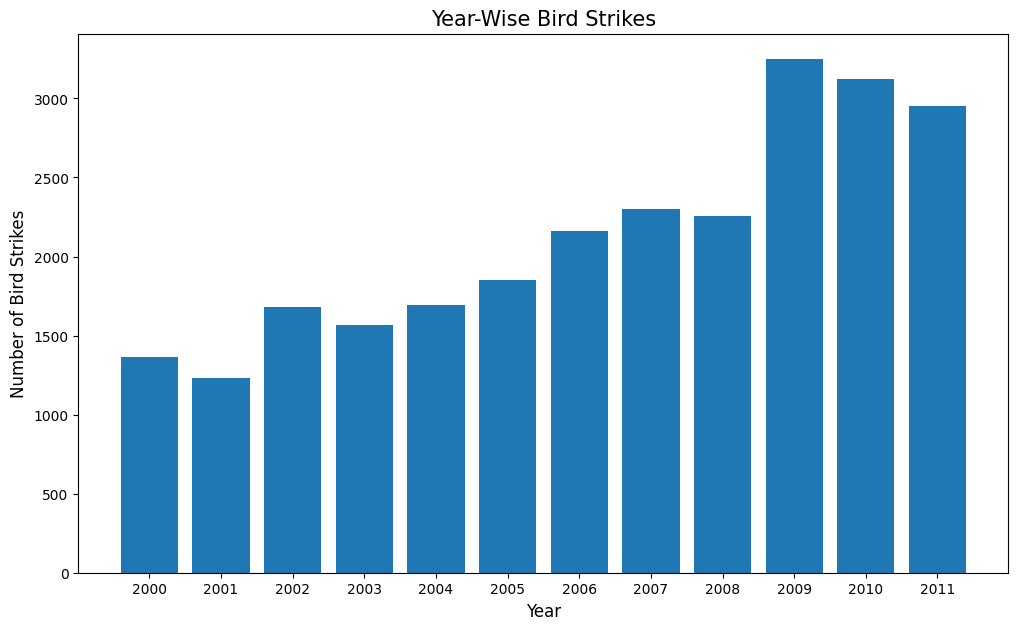

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Year-Wise Bird Strikes',fontdict={"fontsize":15})
plt.bar(year_bird.index,year_bird['count'])
plt.xlabel('Year',fontdict={"fontsize":12})
plt.ylabel('Number of Bird Strikes',fontdict={"fontsize":12})
plt.savefig("year_bird.png")
plt.show()

**You can observe from the above graph that there is continous growth in year with some slightly decrement in some year. But in 2009 there is a massive growth in Bird Strike incidence which get slightly decreased in 2010 and 2011 but still it is greater than as compared to the 2000 to 2008**

***

**Yearly Cost Incurred due to Bird Strikes**

In [ ]:
table.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,FlightYear,FlightMonth
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes,2000,11
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,Unknown,2001-07-25,Caused damage,...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No,2001,7
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,Unknown,2001-09-14,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2001,9
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,Small,Some Cloud,European starling,Y,0,50,0,Yes,2002,9
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,Unknown,2003-06-23,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2003,6


**As in the cost column the data is not in integer type so first changing it into integer type**

In [ ]:
table['Cost: Total $']=table['Cost: Total $'].apply(lambda x:x.replace(',',''))

In [ ]:
table['Cost: Total $']=table['Cost: Total $'].apply(int)

**Grouping Year with their Total Cost**

In [ ]:
cost_per_year=pd.DataFrame(table.groupby('FlightYear')['Cost: Total $'].sum())

In [ ]:
cost_per_year

,Cost: Total $
FlightYear,
2000,5625496
2001,23252168
2002,9046405
2003,13176787
2004,8116866
2005,7026670
2006,18309903
2007,10822426
2008,11966121


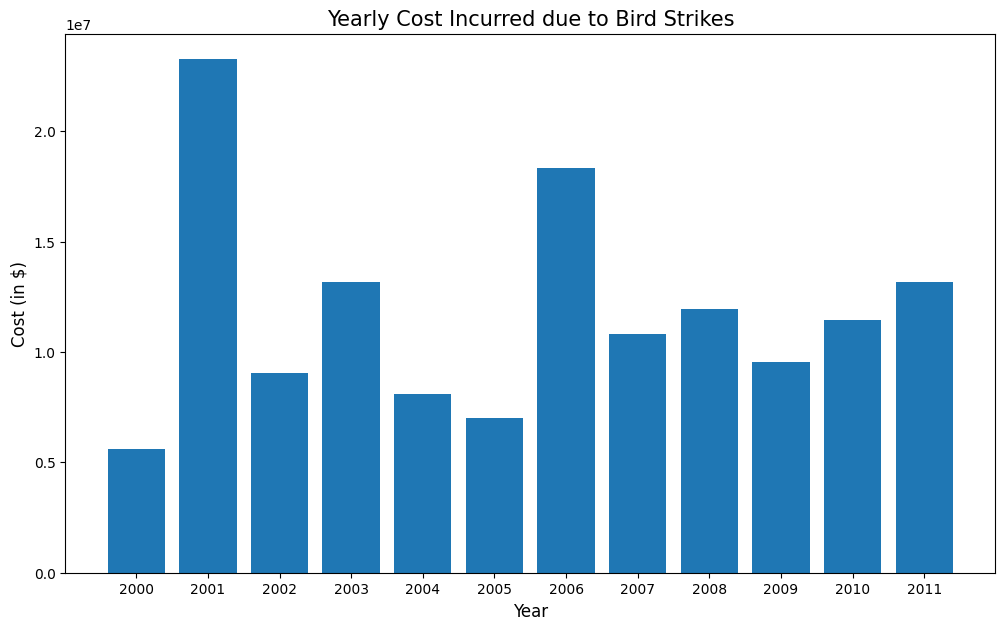

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Yearly Cost Incurred due to Bird Strikes',fontdict={"fontsize":15})
plt.bar(cost_per_year.index,cost_per_year['Cost: Total $'])
plt.xlabel('Year',fontdict={"fontsize":12})
plt.ylabel('Cost (in $)',fontdict={"fontsize":12})
plt.savefig('year_cost.png')
plt.show()

* **Highest cost caused due to bird Strike was in 2001 and in 2006.**
* **We can notice that earlier we found that there were highest incident of Bird Strike in 2009 to 2011, but still there is not much cost caused in those years. This means that they have developed many way to tackle bird strike with less or no cost.**
* **On the other hand we can see that there was highest cost in 2001 but there was not much Bird Strike occured in that year. This means that at that time there was no way was developed to tackle Bird Strike at that time.**


***

**Finding when do most Bird Strikes Occurs**

In [ ]:
table.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,FlightYear,FlightMonth
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,Medium,No Cloud,Unknown bird - medium,N,30736,"1,500",0,Yes,2000,11
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,Unknown,2001-07-25,Caused damage,...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No,2001,7
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,Unknown,2001-09-14,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2001,9
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,Small,Some Cloud,European starling,Y,0,50,0,Yes,2002,9
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,Unknown,2003-06-23,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2003,6


**Extracting the number of bird strikes occur in a month from 2000 to 2011**

In [ ]:
monthly_bird=pd.DataFrame(table['FlightMonth'].value_counts())

**Sorting the Months and also making separate column for month name corresponding to its month index**

In [ ]:
monthly_bird.sort_index(inplace=True)

In [ ]:
monthly_bird['Month']=['January','February','March','April','May','June','July','August','September','October','November','December']

In [ ]:
monthly_bird

,count,Month
FlightMonth,,
1,937,January
10,3038,February
11,1801,March
12,1019,April
2,772,May
3,1233,June
4,1828,July
5,2318,August
6,2078,September


**Plotting the Monthly Bird Strikes data**

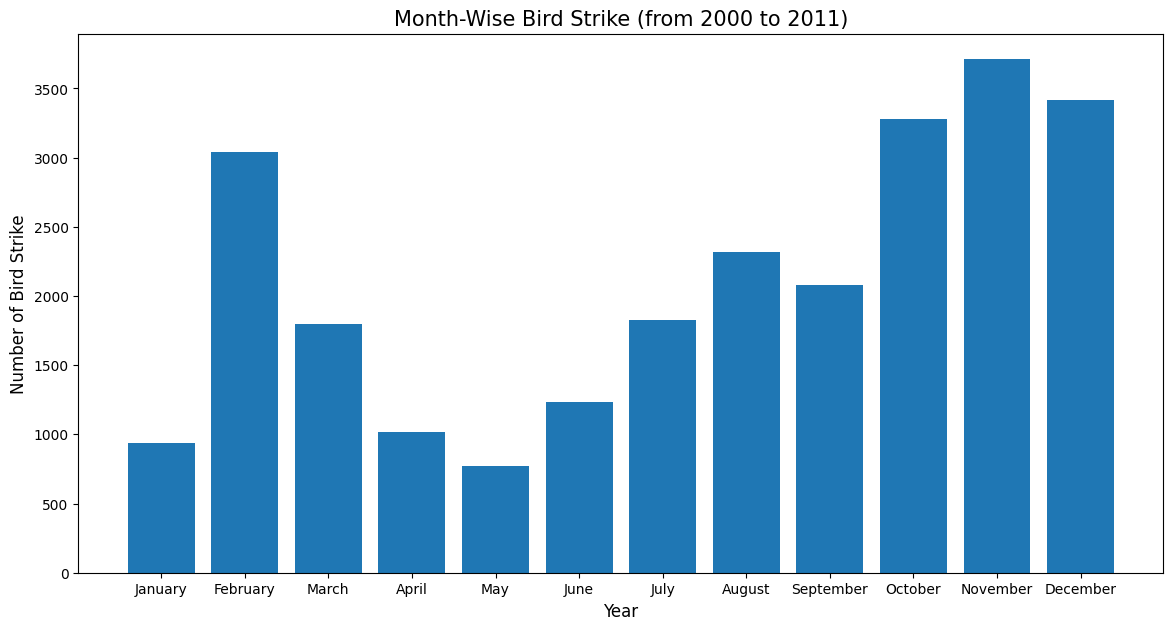

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Month-Wise Bird Strike (from 2000 to 2011)',fontdict={"fontsize":15})
plt.bar(monthly_bird['Month'],monthly_bird['count'])
plt.xlabel('Year',fontdict={"fontsize":12})
plt.ylabel('Number of Bird Strike',fontdict={"fontsize":12})
plt.savefig('year_cost.png')
plt.show()

**We know that Bird Strike is a type of incident that can happen anytime but during migratory season the Bird Strike incident got a major increment :** \
* **Spring Migration** (Late-February to Early June)
* **Fall Migration** (Late-July to December)

***

**Altitude of Aeroplanes at the Time of Strike**

In [ ]:
table.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,FlightYear,FlightMonth
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,Medium,No Cloud,Unknown bird - medium,N,30736,"1,500",0,Yes,2000,11
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,Unknown,2001-07-25,Caused damage,...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No,2001,7
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,Unknown,2001-09-14,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2001,9
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,Small,Some Cloud,European starling,Y,0,50,0,Yes,2002,9
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,Unknown,2003-06-23,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2003,6


**Counting how many times does at the time of Bird Strike were they above 1000ft or below 1000ft**

In [ ]:
altitude=pd.DataFrame(table['Altitude bin'].value_counts())

In [ ]:
altitude

,count
Altitude bin,
< 1000 ft,20556
> 1000 ft,4873


**Plotting the data**

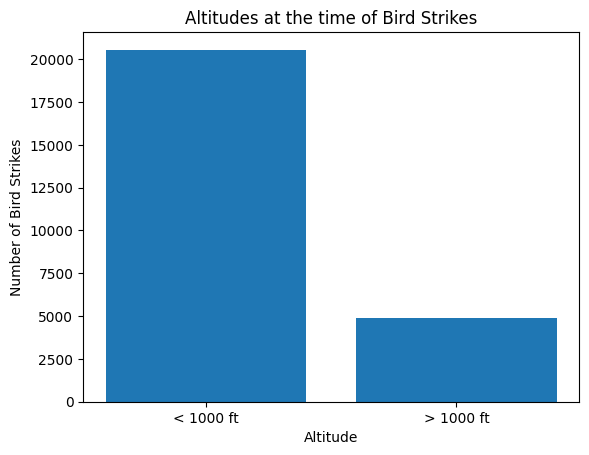

In [ ]:
plt.title('Altitudes at the time of Bird Strikes')
plt.bar(altitude.index,altitude['count'])
plt.xlabel('Altitude')
plt.ylabel('Number of Bird Strikes')
plt.savefig('altitude.png')
plt.show()

**This shows that over 80% times Bird Strike occur when aircraft was below or equal to 1000ft**


***

**Phase of flight at the time of the strike**

In [ ]:
table['When: Phase of flight'].value_counts()

When: Phase of flight
Approach        10382
Landing Roll     5047
Take-off run     4711
Climb            4429
Descent           776
Taxi               74
Parked             10
Name: count, dtype: int64

In [ ]:
phase_bird=pd.DataFrame(table['When: Phase of flight'].value_counts())

In [ ]:
phase_bird

,count
When: Phase of flight,
Approach,10382
Landing Roll,5047
Take-off run,4711
Climb,4429
Descent,776
Taxi,74
Parked,10


Plotting data

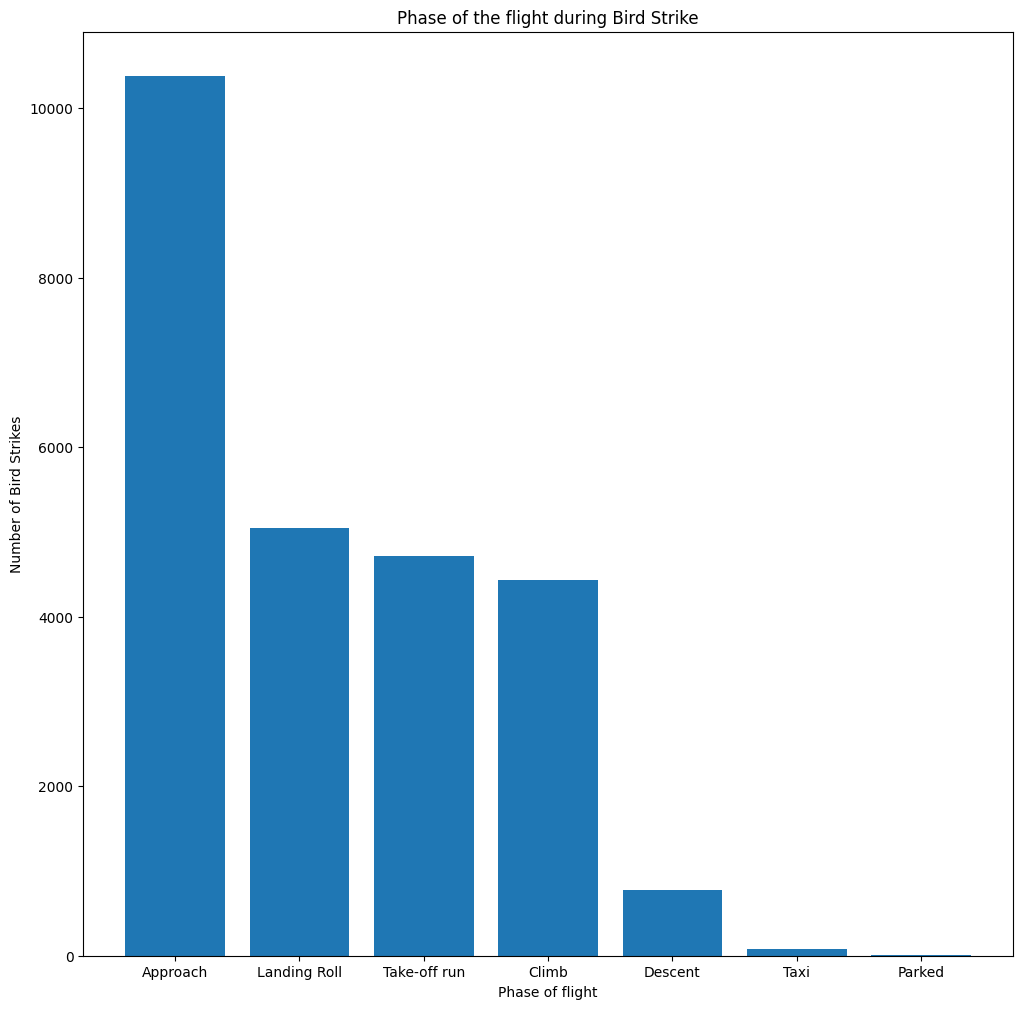

In [ ]:
plt.figure(figsize=(12,12))
plt.title("Phase of the flight during Bird Strike")
plt.bar(phase_bird.index,phase_bird['count'])
plt.ylabel('Number of Bird Strikes')
plt.xlabel('Phase of flight')
plt.savefig('phase_flight.png')
plt.show()

* **Most of the time Bird Strike occur when Aircraft Approach Phase**

* **Least time Bird Strike occur when Aircraft Parked Phase**

***

**Average Altitude of the aeroplanes in different phases at the time of strike**

In [ ]:
table.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,FlightYear,FlightMonth
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,Medium,No Cloud,Unknown bird - medium,N,30736,"1,500",0,Yes,2000,11
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,Unknown,2001-07-25,Caused damage,...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No,2001,7
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,Unknown,2001-09-14,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2001,9
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,Small,Some Cloud,European starling,Y,0,50,0,Yes,2002,9
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,Unknown,2003-06-23,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2003,6


**Changing the data in the Feet above ground column into integer type same as we did Cost column**

In [ ]:
table['Feet above ground']=table['Feet above ground'].apply(lambda x:x.replace(',',''))
table['Feet above ground']=table['Feet above ground'].apply(int)

**Grouping the phase of flight with their altitudes mean**

In [ ]:
avg_altitude=pd.DataFrame(table.groupby('When: Phase of flight')['Feet above ground'].mean())

**Following is the Average Altitude of the corresponding phase of the Aircraft**

In [ ]:
avg_altitude

,Feet above ground
When: Phase of flight,
Approach,1001.733385
Climb,1199.654324
Descent,5933.960052
Landing Roll,0.000000
Parked,0.000000
Take-off run,0.101040
Taxi,0.000000


***

**Effect of Bird Strikes & Impact on Flight**

In [ ]:
table.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,FlightYear,FlightMonth
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,Medium,No Cloud,Unknown bird - medium,N,30736,1500,0,Yes,2000,11
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,Unknown,2001-07-25,Caused damage,...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No,2001,7
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,Unknown,2001-09-14,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2001,9
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,Small,Some Cloud,European starling,Y,0,50,0,Yes,2002,9
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,Unknown,2003-06-23,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2003,6


**Now counting number of effect/impact occur on the Aircraft after Bird Strike**

In [ ]:
impact_bird_strike=pd.DataFrame(table['Effect: Impact to flight'].value_counts())

In [ ]:
impact_bird_strike

,count
Effect: Impact to flight,
Unknown,23351
Precautionary Landing,1121
Aborted Take-off,479
Other,390
Engine Shut Down,88


**Note - Here 'Unknown' is the value we replaces with null values earlier.**

***

**Effect of Strike at Different Altitude**

In [ ]:
table.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,FlightYear,FlightMonth
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,Medium,No Cloud,Unknown bird - medium,N,30736,1500,0,Yes,2000,11
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,Unknown,2001-07-25,Caused damage,...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No,2001,7
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,Unknown,2001-09-14,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2001,9
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,Small,Some Cloud,European starling,Y,0,50,0,Yes,2002,9
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,Unknown,2003-06-23,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2003,6


**This is the plotting of the graph that shows in what altitude plane was at the time of effect/impact due to Bird Strike on the Aircraft**

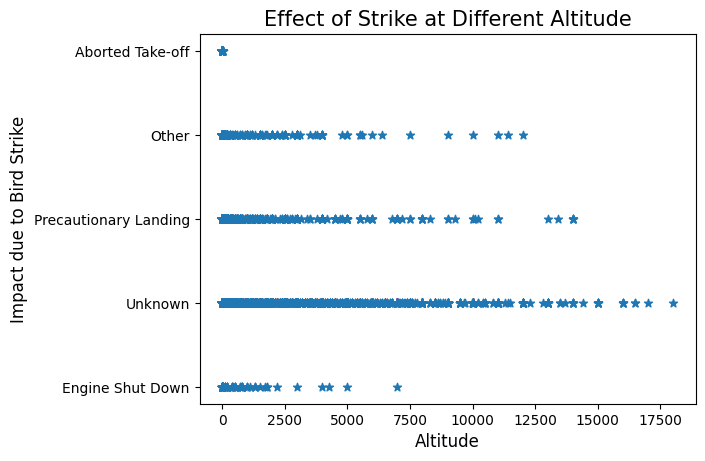

In [ ]:
plt.scatter(table['Feet above ground'],table['Effect: Impact to flight'],marker='*')
plt.title('Effect of Strike at Different Altitude',fontdict={'fontsize':15})
plt.xlabel('Altitude',fontdict={'fontsize':12})
plt.ylabel('Impact due to Bird Strike',fontdict={'fontsize':12})
plt.savefig('effect_alt.png')
plt.show()

***

**The Number of Bird Strike incident happened when Pilot was informed or not**


In [ ]:
pd.DataFrame(table['Pilot warned of birds or wildlife?'].value_counts())

,count
Pilot warned of birds or wildlife?,
N,14567
Y,10862


***

**If there was any damage occured on the Aircraft due to Bird Strike**

In [ ]:
pd.DataFrame(table['Effect: Indicated Damage'].value_counts())

,count
Effect: Indicated Damage,
No damage,22975
Caused damage,2454


***

**Were Pilot was warned or not before the Bird Strike?**

* **Grouping 'Pilot warned of birds or wildlife?' column with 'Effect: Impact to flight' with its value counts.**

In [ ]:
table.groupby('Pilot warned of birds or wildlife?')['Effect: Impact to flight'].value_counts()

Pilot warned of birds or wildlife?  Effect: Impact to flight
N                                   Unknown                     13398
                                    Precautionary Landing         619
                                    Aborted Take-off              250
                                    Other                         248
                                    Engine Shut Down               52
Y                                   Unknown                      9953
                                    Precautionary Landing         502
                                    Aborted Take-off              229
                                    Other                         142
                                    Engine Shut Down               36
Name: count, dtype: int64

* **Separating this group in two part, 'pilot_was_warned' which contain all the data for pilot was warned and 'pilot_not_warned' which contain all the data for pilot was not warned. After that we will make them into dataframe.**

In [ ]:
pilot_was_warned=pd.DataFrame(table.groupby('Pilot warned of birds or wildlife?')['Effect: Impact to flight'].value_counts()['Y'])

In [ ]:
pilot_not_warned=pd.DataFrame(table.groupby('Pilot warned of birds or wildlife?')['Effect: Impact to flight'].value_counts()['N'])

In [ ]:
pilot_was_warned

,count
Effect: Impact to flight,
Unknown,9953
Precautionary Landing,502
Aborted Take-off,229
Other,142
Engine Shut Down,36


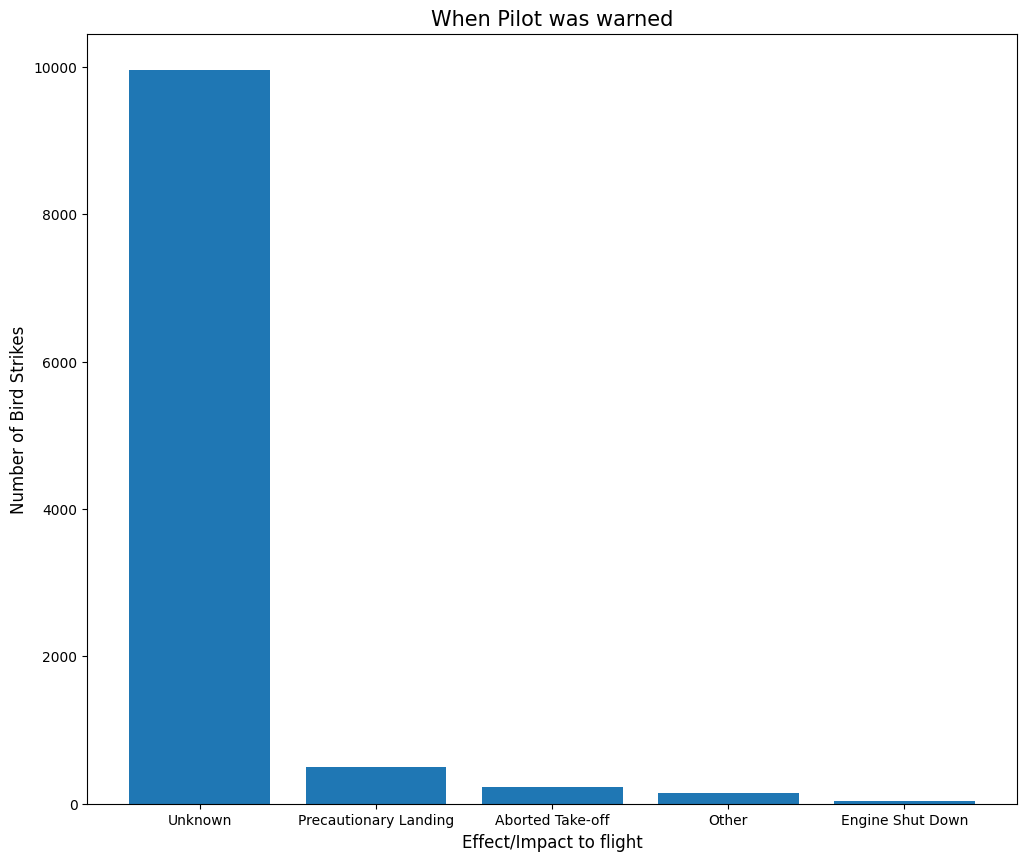

In [ ]:
plt.figure(figsize=(12,10))
plt.title('When Pilot was warned',fontdict={"fontsize":15})
plt.bar(pilot_was_warned.index,pilot_was_warned['count'])
plt.xlabel('Effect/Impact to flight',fontdict={"fontsize":12})
plt.ylabel('Number of Bird Strikes',fontdict={"fontsize":12})
plt.savefig('pilot_yes.png')
plt.show()

**Note - Here 'Unknown' is the value we replaces with null values earlier**

***

In [ ]:
pilot_not_warned

,count
Effect: Impact to flight,
Unknown,13398
Precautionary Landing,619
Aborted Take-off,250
Other,248
Engine Shut Down,52


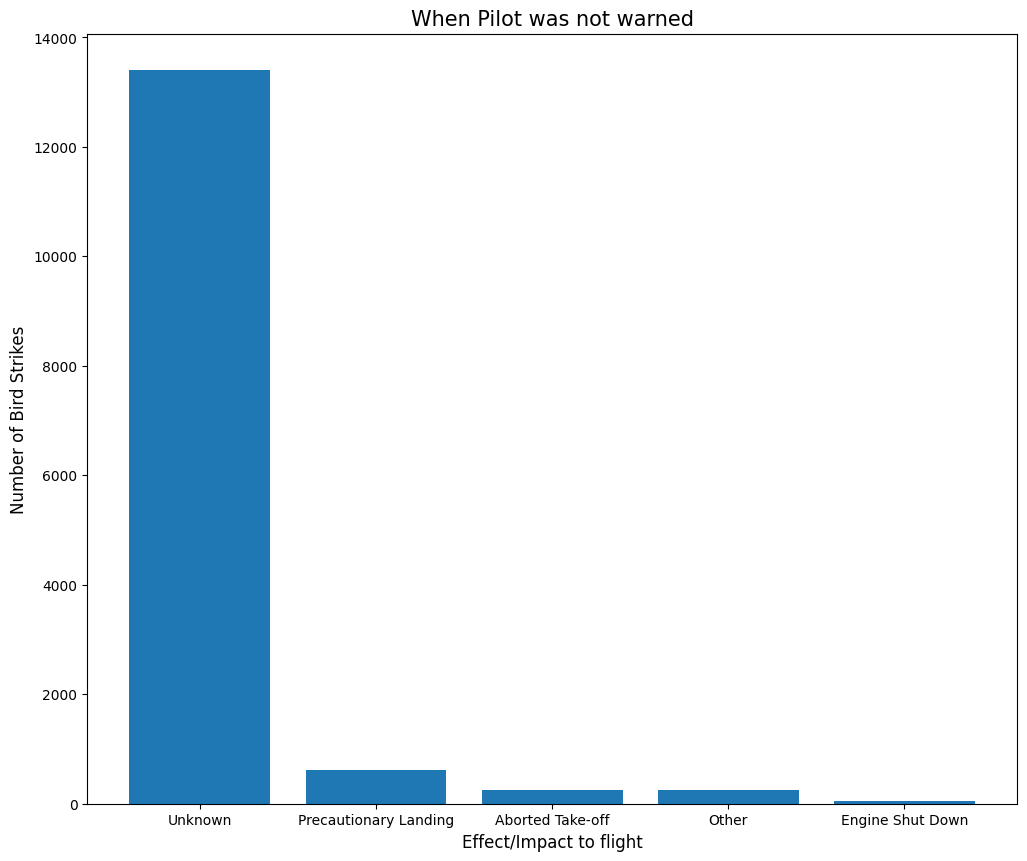

In [ ]:
plt.figure(figsize=(12,10))
plt.title('When Pilot was not warned',fontdict={"fontsize":15})
plt.bar(pilot_not_warned.index,pilot_not_warned['count'])
plt.xlabel('Effect/Impact to flight',fontdict={"fontsize":12})
plt.ylabel('Number of Bird Strikes',fontdict={"fontsize":12})
plt.savefig('pilot_no.png')
plt.show()

**Note - Here 'Unknown' is the value we replaces with null values earlier**

***

In [ ]:
table.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,FlightYear,FlightMonth
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,Medium,No Cloud,Unknown bird - medium,N,30736,1500,0,Yes,2000,11
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,Unknown,2001-07-25,Caused damage,...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No,2001,7
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,Unknown,2001-09-14,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2001,9
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,Small,Some Cloud,European starling,Y,0,50,0,Yes,2002,9
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,Unknown,2003-06-23,No damage,...,Small,No Cloud,European starling,N,0,50,0,No,2003,6


**Range of number of Bird(s) that got Struck**

In [ ]:
pd.DataFrame(table['Wildlife: Number struck'].value_counts())

,count
Wildlife: Number struck,
1,20790
2 to 10,4319
11 to 100,312
Over 100,8


**So, we can say that if there is a Bird Strike then there is-**
1. **82% chances that there is only 1 bird.**
2. **16.8% chances that there is 2 to 10 birds.**
3. **1% chances that there 11 to 100 birds.**
4. **0.2% chances that there over 100 birds.**

***

**Was the Aircraft Large or not?**

In [ ]:
pd.DataFrame(table['Is Aircraft Large?'].value_counts())

,count
Is Aircraft Large?,
No,17027
Yes,8402


**When Bird Strike happend then there is -**
1. **67% chances that the Aircraft is Not Large.**
2. **33% chances that the Aircraft is Large.**

***

**Number of people getting injured**

In [ ]:
pd.DataFrame(table['Number of people injured'].value_counts())

,count
Number of people injured,
0,25416
1,9
2,3
6,1


**We can see that there are very less probablity of people getting injured due to Bird Strike on the Aircraft**

***